In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Cross validation
from sklearn.model_selection import learning_curve

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

# Scoring
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Tuning et overfitting
from sklearn.model_selection import validation_curve

# Rapport de classification
from sklearn.metrics import classification_report

# Addons
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Config
from sklearn import set_config
set_config(display="diagram") # To show our model diagrams 

In [3]:
df = pd.read_csv('avisassurance_train.csv', sep=';')

In [4]:
data = df.copy()

In [5]:
data

,date,note,auteur,avis,assureur,produit
0,06 septem...,5,brahim--k-131532,"Meilleurs assurances, prix, solutions, écoute,...",Direct Assurance,auto
1,03 mai 20...,4,bernard-g-112497,"je suis globalement satisfait , sauf que vous ...",Direct Assurance,auto
2,21 mars 2...,5,virginie-t-107352,Prix tres abordable plusieurs options s'offren...,Direct Assurance,auto
3,10 juin 2...,4,boulain-f-116580,"je satisfait du service, une réponse très rapi...",L'olivier Assurance,auto
4,29 janvie...,1,ouaille31-51798,"Client depuis plus de 25 ans, très déçu de cet...",Matmut,auto
...,...,...,...,...,...,...
24100,22 mars 2...,1,hophop-107522,Assurance moto chez la mutuel des motards en F...,Mutuelle des Motards,moto
24101,06 décemb...,1,tzl-81680,Même les demandes les plus simples n'aboutisse...,Allianz,habitation
24102,14 avril ...,1,jmr-72500-110395,"En décembre 2019, j'ai souscrit à un contrat C...",Cegema Assurances,sante
24103,11 juille...,3,cris-77532,Je suis assurer à la gmf depuis plus de 15 ans...,GMF,auto


In [6]:
data.columns

Index(['date', 'note', 'auteur', 'avis', 'assureur', 'produit'], dtype='object')

In [7]:
data.dtypes

date        object
note         int64
auteur      object
avis        object
assureur    object
produit     object
dtype: object

In [8]:
for col in ['date','avis']:
    data[col] = data[col].astype('string')

In [9]:
for col in ['auteur', 'assureur', 'produit']:
    data[col] = data[col].astype('category')

In [10]:
data.dtypes

date          string
note           int64
auteur      category
avis          string
assureur    category
produit     category
dtype: object

In [11]:
X = data.copy().drop(['note','avis'], axis=1)
y = data.note.copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [13]:
categorical_pipeline = Pipeline(steps=[( 'onehot',OneHotEncoder(handle_unknown = 'ignore'))])

In [15]:
categorical_features =  data.select_dtypes(include=['category']).columns

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
                    ('cat', categorical_pipeline, categorical_features)
    ])

In [57]:
SVC_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svc', SVC())
    ])

RFC_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('rfc', RandomForestClassifier())
    ])

GBC_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('gbc', GradientBoostingClassifier())
    ])

In [58]:
fitted_SVC_model = SVC_model.fit(X_train, y_train)
fitted_RFC_model = RFC_model.fit(X_train, y_train)
fitted_GBC_model = GBC_model.fit(X_train, y_train)

In [59]:
fitted_SVC_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['auteur', 'assureur', 'produit'], dtype='object'))])),
                ('svc', SVC())])

In [60]:
fitted_RFC_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['auteur', 'assureur', 'produit'], dtype='object'))])),
                ('rfc', RandomForestClassifier())])

In [61]:
fitted_GBC_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['auteur', 'assureur', 'produit'], dtype='object'))])),
                ('gbc', GradientBoostingClassifier())])

In [62]:
y_prediction_SVC = fitted_SVC_model.predict(X_test)
y_prediction_RFC = fitted_RFC_model.predict(X_test)
y_prediction_GBC = fitted_GBC_model.predict(X_test)

In [63]:
target_names = ['classe note '+str(i) for i in range(1,6)]
print("SVC model")
print(classification_report(y_test, y_prediction_SVC, target_names=target_names, zero_division=1))
print("RFC model")
print(classification_report(y_test, y_prediction_RFC, target_names=target_names, zero_division=1))
print("GBC model")
print(classification_report(y_test, y_prediction_GBC, target_names=target_names, zero_division=1))


SVC model
               precision    recall  f1-score   support

classe note 1       0.56      0.74      0.64      2195
classe note 2       0.36      0.04      0.08      1105
classe note 3       1.00      0.00      0.00       990
classe note 4       0.29      0.46      0.35      1469
classe note 5       0.40      0.51      0.45      1473

     accuracy                           0.43      7232
    macro avg       0.52      0.35      0.30      7232
 weighted avg       0.50      0.43      0.37      7232

RFC model
               precision    recall  f1-score   support

classe note 1       0.56      0.74      0.64      2195
classe note 2       0.36      0.05      0.09      1105
classe note 3       0.12      0.00      0.00       990
classe note 4       0.29      0.45      0.35      1469
classe note 5       0.40      0.52      0.45      1473

     accuracy                           0.43      7232
    macro avg       0.35      0.35      0.31      7232
 weighted avg       0.38      0.43      

In [ ]:
model = SVC_modelm
N, train_score, val_score = learning_curve(
                                            model,
                                            X_train, y_train,
                                            train_sizes = np.linspace(0.1, 1.0, 10),
                                            cv=5
                                         )

In [91]:
val_score.mean(axis=1)

array([0.40976659, 0.41302631, 0.41610837, 0.41207883, 0.41841976,
       0.41836066, 0.42025676, 0.41978283, 0.41990156, 0.42102738])

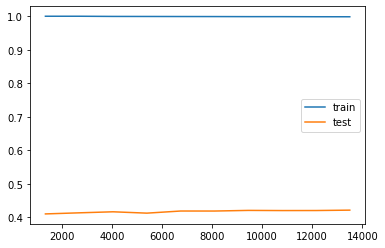

In [103]:
plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="test")
plt.legend()